In [1]:
from keras import models
from keras import layers
from keras.utils import to_categorical
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import io

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# https://drive.google.com/open?id=1mypSe66DjS1NEXdcN3b4NJw8WjQIP39z
downloaded = drive.CreateFile({'id':'1mypSe66DjS1NEXdcN3b4NJw8WjQIP39z'}) 
downloaded.GetContentFile('Test_Data.csv')  

# https://drive.google.com/open?id=1zXJ4i_byS4XezWo-TdCjlvalwJy2Pb64
downloaded = drive.CreateFile({'id':'1zXJ4i_byS4XezWo-TdCjlvalwJy2Pb64'}) 
downloaded.GetContentFile('Train_Data.csv') 

#https://drive.google.com/open?id=1TZH_sw6we5GB1n0E4v2kBQhkxFg8Edku
downloaded = drive.CreateFile({'id':'1TZH_sw6we5GB1n0E4v2kBQhkxFg8Edku'}) 
downloaded.GetContentFile('Validation_Data.csv') 

In [4]:
!ls

adc.json  sample_data  Test_Data.csv  Train_Data.csv  Validation_Data.csv


In [0]:
with open('Train_Data.csv', 'r') as f:
  f.readline()
  clean_lines = (line.replace(' ',',') for line in f)
  train_data = np.genfromtxt(clean_lines, dtype=int, delimiter=',')

with open('Test_Data.csv', 'r') as f:
  f.readline()
  clean_lines = (line.replace(' ',',') for line in f)
  test_data = np.genfromtxt(clean_lines, dtype=int, delimiter=',')

with open('Validation_Data.csv', 'r') as f:
  f.readline()
  clean_lines = (line.replace(' ',',') for line in f)
  val_data = np.genfromtxt(clean_lines, dtype=int, delimiter=',')

In [6]:
train_data_y_original = train_data[:,0]
train_data_X = ( train_data[:,1:] / 255.0 ) - 0.5
test_data_y_original = test_data[:,0] 
test_data_X = ( test_data[:,1:] / 255.0 ) - 0.5
val_data_y_original = val_data[:,0]
val_data_X = ( val_data[:,1:] / 255.0 ) - 0.5

train_data_y = to_categorical(train_data_y_original)
test_data_y = to_categorical(test_data_y_original)
val_data_y = to_categorical(val_data_y_original)

train_data_X_2D = np.zeros(shape=(train_data_X.shape[0],48,48,))
test_data_X_2D = np.zeros(shape=(test_data_X.shape[0],48,48))
val_data_X_2D = np.zeros(shape=(val_data_X.shape[0],48,48))

for i in range(train_data_X.shape[0]):
  img = train_data_X[i].reshape(48,48)
  train_data_X_2D[i,:,:] = img

for i in range(test_data_X.shape[0]):
  img = test_data_X[i].reshape(48,48)
  test_data_X_2D[i,:,:] = img

for i in range(val_data_X.shape[0]):
  img = val_data_X[i].reshape(48,48)
  val_data_X_2D[i,:,:] = img

train_data_X_2D = train_data_X_2D.reshape((train_data_X_2D.shape[0],train_data_X_2D.shape[1],train_data_X_2D.shape[2],1))
test_data_X_2D = test_data_X_2D.reshape((test_data_X_2D.shape[0],test_data_X_2D.shape[1],test_data_X_2D.shape[2],1))
val_data_X_2D = val_data_X_2D.reshape((val_data_X_2D.shape[0],val_data_X_2D.shape[1],val_data_X_2D.shape[2],1))

print(train_data_X.shape)
print(test_data_X.shape)
print(val_data_X.shape)
print(train_data_X_2D.shape)
print(train_data_y.shape)
print(test_data_X_2D.shape)
print(test_data_y.shape)
print(val_data_X_2D.shape)
print(val_data_y.shape)


(28709, 2304)
(3589, 2304)
(3589, 2304)
(28709, 48, 48, 1)
(28709, 7)
(3589, 48, 48, 1)
(3589, 7)
(3589, 48, 48, 1)
(3589, 7)


# Question (a)

Angry 



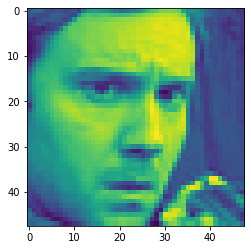

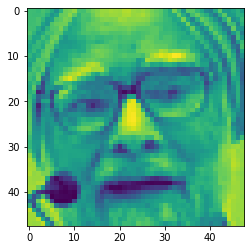

Disgust 



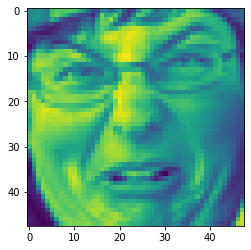

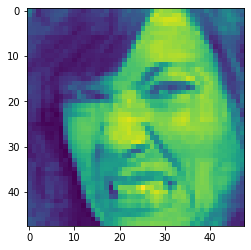

Fear 



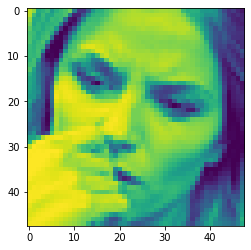

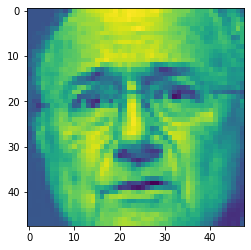

Happy 



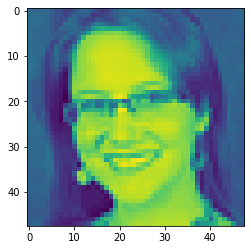

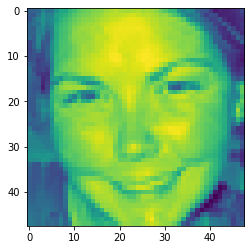

Sad 



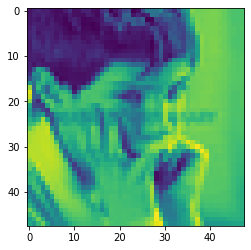

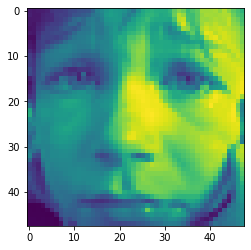

Surprise 



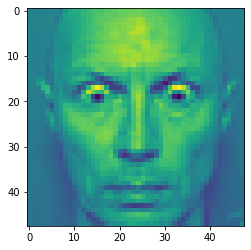

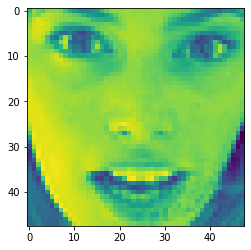

Neutral 



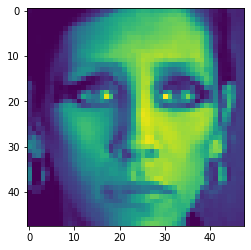

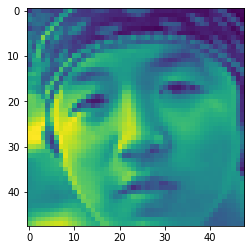

In [15]:
emotionList = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
for emotionVal in range(len(emotionList)):

  num = 0
  plt.figure()
  print(emotionList[emotionVal], '\n')
  for i in range(train_data_X.shape[0]):
    if train_data_y_original[i] == emotionVal:
      num += 1
      plt.imshow(train_data_X[i].reshape(48,48))
      plt.show()
      if num == 2:
        break


# Question (b)

In [16]:
print('\nNumber of emotions in Training Data')
for i in range(len(emotionList)):
  print(emotionList[i] , ' : ' , np.sum(train_data_y_original == i))


Number of emotions in Training Data
Angry  :  3995
Disgust  :  436
Fear  :  4097
Happy  :  7215
Sad  :  4830
Surprise  :  3171
Neutral  :  4965


In [0]:
def generate_FNN_model_1():

  m = models.Sequential()
  m.add(layers.Dense( 50 , input_shape = (2304,), activation='relu'))
  m.add(layers.Dropout(0.3))
  m.add(layers.Dense( 50 , activation='relu'))
  m.add(layers.Dropout(0.3))
  m.add(layers.Dense( 50 , activation='relu'))
  m.add(layers.Dropout(0.3))
  m.add(layers.Dense( 50 , activation='relu'))
  m.add(layers.Dropout(0.3))
  m.add(layers.Dense( 50 , activation='relu'))
  m.add(layers.Dropout(0.3))
  m.add(layers.Dense( 7 , activation='relu'))

  m.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

  return m

In [26]:
FNN_network = generate_FNN_model_1()
FNN_network.summary()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_289 (Dense)            (None, 50)                115250    
_________________________________________________________________
dropout_193 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_290 (Dense)            (None, 50)                2550      
_________________________________________________________________
dropout_194 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_291 (Dense)            (None, 50)                2550      
_________________________________________________________________
dropout_195 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_292 (Dense)            (None, 50)              

In [0]:
%%time
history = FNN_network.fit(train_data_X, train_data_y, epochs=1000, batch_size=60000)

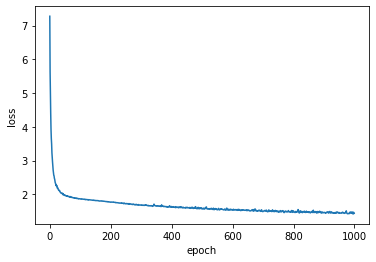

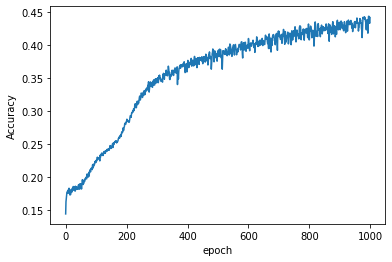

In [29]:
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(history.history['loss'])

plt.figure()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['acc'])

In [30]:
loss, test_acc = FNN_network.evaluate(test_data_X, test_data_y)
print('test_acc: ', test_acc)

loss, val_acc = FNN_network.evaluate(val_data_X, val_data_y)
print('test_acc: ', val_acc)

3589/3589 [==============================] - 1s 188us/step
test_acc:  0.39509612705488995
3589/3589 [==============================] - 0s 67us/step
test_acc:  0.3970465310837572


In [0]:
def generate_FNN_model_2():

  m = models.Sequential()
  m.add(layers.Dense( 50 , input_shape = (2304,), activation='relu'))
  m.add(layers.Dropout(0.3))
  m.add(layers.Dense( 50 , activation='relu'))
  m.add(layers.Dropout(0.3))
  m.add(layers.Dense( 50 , activation='relu'))
  m.add(layers.Dropout(0.3))
  m.add(layers.Dense( 7 , activation='relu'))

  m.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

  return m

In [32]:
FNN_network2 = generate_FNN_model_2()
FNN_network2.summary()

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_295 (Dense)            (None, 50)                115250    
_________________________________________________________________
dropout_198 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_296 (Dense)            (None, 50)                2550      
_________________________________________________________________
dropout_199 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_297 (Dense)            (None, 50)                2550      
_________________________________________________________________
dropout_200 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_298 (Dense)            (None, 7)               

In [0]:
%%time
history = FNN_network2.fit(train_data_X, train_data_y, epochs=1000, batch_size=60000)

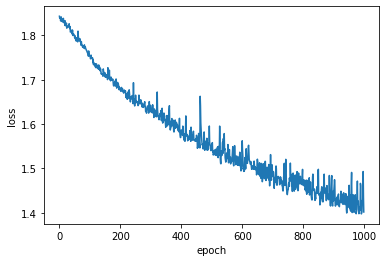

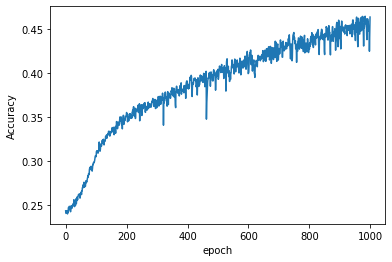

In [35]:
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(history.history['loss'])

plt.figure()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['acc'])

In [36]:
test_loss, test_acc = FNN_network2.evaluate(test_data_X, test_data_y)
print('test_acc: ', test_acc)

val_loss, val_acc = FNN_network2.evaluate(val_data_X, val_data_y)
print('test_acc: ', val_acc)

3589/3589 [==============================] - 1s 184us/step
test_acc:  0.4204513792184177
3589/3589 [==============================] - 0s 64us/step
test_acc:  0.41877960435491846


In [0]:
def generate_FNN_model_3():

  m = models.Sequential()
  m.add(layers.Dense( 100 , input_shape = (2304,), activation='relu'))
  m.add(layers.Dense( 100 , activation='relu'))
  m.add(layers.Dense( 100 , activation='relu'))
  m.add(layers.Dense( 100 , activation='relu'))
  m.add(layers.Dense( 7 , activation='relu'))

  m.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

  return m

In [38]:
FNN_network3 = generate_FNN_model_3()
FNN_network3.summary()

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_299 (Dense)            (None, 100)               230500    
_________________________________________________________________
dense_300 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_301 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_302 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_303 (Dense)            (None, 7)                 707       
Total params: 261,507
Trainable params: 261,507
Non-trainable params: 0
_________________________________________________________________


In [0]:
%%time
history = FNN_network3.fit(train_data_X, train_data_y, epochs=1000, batch_size=60000)

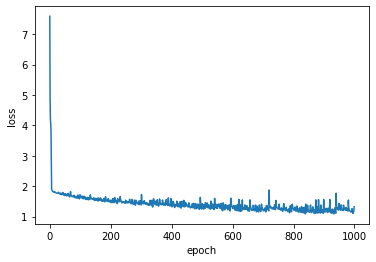

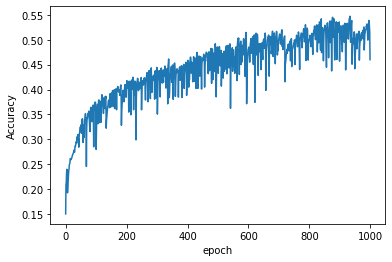

In [40]:
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(history.history['loss'])

plt.figure()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['acc'])

In [41]:
test_loss, test_acc = FNN_network3.evaluate(test_data_X, test_data_y)
print('test_acc: ', test_acc)

val_loss, val_acc = FNN_network3.evaluate(val_data_X, val_data_y)
print('test_acc: ', val_acc)

3589/3589 [==============================] - 1s 199us/step
test_acc:  0.39398161047645586
3589/3589 [==============================] - 0s 66us/step
test_acc:  0.39732516024497333


In [0]:
def generate_CNN_model():

  m = models.Sequential()
  
  m.add(layers.Conv2D( 10, kernel_size=3 , strides=(1,1), activation='relu' , input_shape = (48,48,1) ))
  m.add(layers.MaxPooling2D(pool_size=(2,2)))
  m.add(layers.Dropout(0.1))
  
  m.add(layers.Conv2D( 10, kernel_size=3 , strides=(1,1), activation='relu') )
  m.add(layers.MaxPooling2D(pool_size=(2,2)))
  m.add(layers.Dropout(0.2))
  
  m.add(layers.Conv2D( 32, kernel_size=3 , strides=(1,1), activation='relu') )
  m.add(layers.MaxPooling2D(pool_size=(2,2)))
  m.add(layers.Dropout(0.3))

  m.add(layers.Flatten())
  m.add(layers.Dense( 30 , activation='relu'))
  m.add(layers.Dense( 7 , activation='softmax'))

  m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return m

In [44]:
CNN_network = generate_CNN_model()
CNN_network.summary()


Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 10)        100       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 10)        0         
_________________________________________________________________
dropout_201 (Dropout)        (None, 23, 23, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 10)        910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 10)        0         
_________________________________________________________________
dropout_202 (Dropout)        (None, 10, 10, 10)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)       

In [0]:
%%time
history = CNN_network.fit(train_data_X_2D, train_data_y, epochs=1000, batch_size=1000)

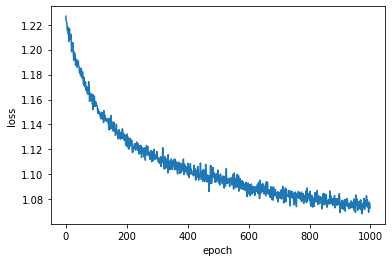

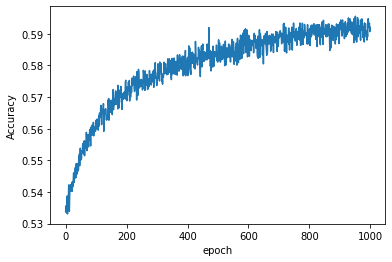

In [47]:
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(history.history['loss'])

plt.figure()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['acc'])

In [48]:
loss, test_acc = CNN_network.evaluate(test_data_X_2D, test_data_y)
print('test_acc: ', test_acc)

loss, val_acc = CNN_network.evaluate(val_data_X_2D, val_data_y)
print('val_acc: ', val_acc)

3589/3589 [==============================] - 1s 257us/step
test_acc:  0.578991362504821
3589/3589 [==============================] - 0s 81us/step
val_acc:  0.5675675675758713


In [0]:
def generate_CNN_model2():

  m = models.Sequential()
  
  m.add(layers.Conv2D( 70, kernel_size=3 , strides=(1,1), activation='relu' , input_shape = (48,48,1) )) #padding = 'same'
  m.add(layers.MaxPooling2D(pool_size=(2,2)))
  m.add(layers.Dropout(0.1))
  
  m.add(layers.Conv2D( 70, kernel_size=3 , strides=(1,1), activation='relu') )
  m.add(layers.MaxPooling2D(pool_size=(2,2)))
  m.add(layers.Dropout(0.2))
  
  m.add(layers.Conv2D( 70, kernel_size=5 , strides=(1,1), activation='relu') )
  m.add(layers.MaxPooling2D(pool_size=(2,2)))
  m.add(layers.Dropout(0.3))

  m.add(layers.Flatten())
  m.add(layers.Dense( 50 , activation='relu'))
  m.add(layers.Dense( 7 , activation='softmax'))

  m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return m

In [52]:
CNN_network2 = generate_CNN_model2()
CNN_network2.summary()

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 46, 46, 70)        700       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 23, 23, 70)        0         
_________________________________________________________________
dropout_207 (Dropout)        (None, 23, 23, 70)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 21, 70)        44170     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 10, 10, 70)        0         
_________________________________________________________________
dropout_208 (Dropout)        (None, 10, 10, 70)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 6, 6, 70)        

In [0]:
%%time
history = CNN_network2.fit(train_data_X_2D, train_data_y, epochs=1000, batch_size=1000)

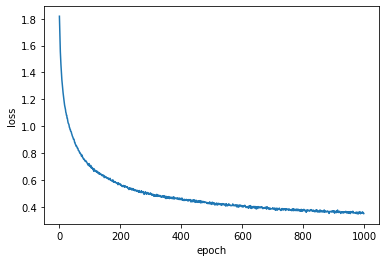

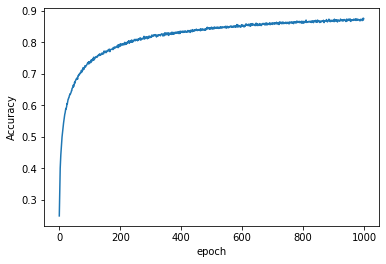

In [54]:
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(history.history['loss'])

plt.figure()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['acc'])

In [55]:
loss, test_acc = CNN_network2.evaluate(test_data_X_2D, test_data_y)
print('test_acc: ', test_acc)

loss, val_acc = CNN_network2.evaluate(val_data_X_2D, val_data_y)
print('val_acc: ', val_acc)

3589/3589 [==============================] - 1s 286us/step
test_acc:  0.6010030649538058
3589/3589 [==============================] - 0s 96us/step
val_acc:  0.6043466146891082


In [0]:
def generate_CNN_model3():

  m = models.Sequential()
  
  m.add(layers.Conv2D( 50, kernel_size=3 , strides=(1,1), activation='relu' , input_shape = (48,48,1) )) #padding = 'same'
  m.add(layers.MaxPooling2D(pool_size=(2,2)))
  m.add(layers.Dropout(0.1))
  
  m.add(layers.Conv2D( 50, kernel_size=3 , strides=(1,1), activation='relu') )
  m.add(layers.MaxPooling2D(pool_size=(2,2)))
  m.add(layers.Dropout(0.2))
  
  m.add(layers.Conv2D( 50, kernel_size=5 , strides=(1,1), activation='relu') )
  m.add(layers.MaxPooling2D(pool_size=(2,2)))
  m.add(layers.Dropout(0.3))

  m.add(layers.Conv2D( 50, kernel_size=3 , strides=(1,1), activation='relu', padding = 'same') )
  m.add(layers.MaxPooling2D(pool_size=(2,2)))
  m.add(layers.Dropout(0.4))

  m.add(layers.Flatten())
  m.add(layers.Dense( 50 , activation='relu'))
  m.add(layers.Dense( 7 , activation='softmax'))

  m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return m

In [57]:
CNN_network3 = generate_CNN_model3()
CNN_network3.summary()

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 46, 46, 50)        500       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 23, 23, 50)        0         
_________________________________________________________________
dropout_210 (Dropout)        (None, 23, 23, 50)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 21, 21, 50)        22550     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 10, 10, 50)        0         
_________________________________________________________________
dropout_211 (Dropout)        (None, 10, 10, 50)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 6, 6, 50)        

In [0]:
%%time
history = CNN_network3.fit(train_data_X_2D, train_data_y, epochs=1000, batch_size=1000)

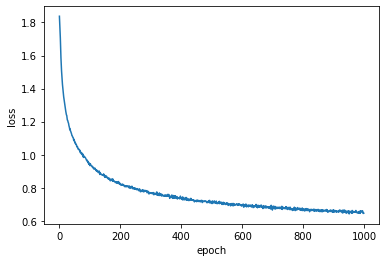

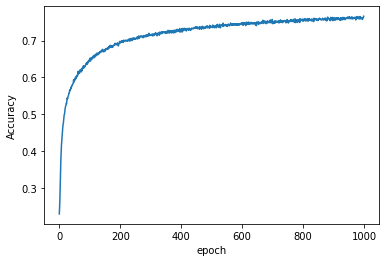

In [59]:
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(history.history['loss'])

plt.figure()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['acc'])

In [60]:
test_loss, test_acc = CNN_network3.evaluate(test_data_X_2D, test_data_y)
print('test_acc: ', test_acc)

test_loss, val_acc = CNN_network3.evaluate(val_data_X_2D, val_data_y)
print('val_acc: ', val_acc)

3589/3589 [==============================] - 1s 289us/step
test_acc:  0.6101978267092797
3589/3589 [==============================] - 0s 92us/step
val_acc:  0.5904151574337705


In [0]:
def generate_CNN_model4():

  m = models.Sequential()
  
  m.add(layers.Conv2D( 100, kernel_size=3 , strides=(1,1), activation='relu' , input_shape = (48,48,1) )) #padding = 'same'
  m.add(layers.MaxPooling2D(pool_size=(2,2)))
  m.add(layers.Dropout(0.1))
  
  m.add(layers.Conv2D( 100, kernel_size=3 , strides=(1,1), activation='relu') )
  m.add(layers.MaxPooling2D(pool_size=(2,2)))
  m.add(layers.Dropout(0.2))
  
  m.add(layers.Conv2D( 100, kernel_size=5 , strides=(1,1), activation='relu') )
  m.add(layers.MaxPooling2D(pool_size=(2,2)))
  m.add(layers.Dropout(0.3))

  m.add(layers.Conv2D( 100, kernel_size=3 , strides=(1,1), activation='relu', padding = 'same') )
  m.add(layers.MaxPooling2D(pool_size=(2,2)))
  m.add(layers.Dropout(0.4))

  m.add(layers.Flatten())
  m.add(layers.Dense( 1000 , activation='relu'))
  m.add(layers.Dense( 7 , activation='softmax'))

  m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return m

In [0]:
print(train_data_X_2D.shape)
print(train_data_y.shape)
CNN_network4 = generate_CNN_model4()
CNN_network4.fit(train_data_X_2D, train_data_y, epochs=1000, batch_size=1000)

In [0]:
plt.plot(CNN_network4.history.history['loss'])
plt.figure()
plt.plot(CNN_network4.history.history['acc'])

In [0]:
test_loss, test_acc = CNN_network4.evaluate(test_data_X_2D, test_data_y)
print('test_acc: ', test_acc)

test_loss, val_acc = CNN_network4.evaluate(val_data_X_2D, val_data_y)
print('val_acc: ', val_acc)

3589/3589 [==============================] - 1s 178us/step
test_acc:  0.6082474227136275
3589/3589 [==============================] - 0s 90us/step
val_acc:  0.5998885483504603


# Fine Tuning


In [61]:
from keras.applications.vgg16 import VGG16
vggModel = VGG16(include_top=False, weights='imagenet', input_shape=(48,48,3))

58892288/58889256 [==============================] - 2s 0us/step


In [65]:
for layer in vggModel.layers[:-2]:
  layer.trainable = False


model = models.Sequential()
model.add(vggModel)
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_314 (Dense)            (None, 100)               51300     
_________________________________________________________________
dropout_215 (Dropout)        (None, 100)               0         
_________________________________________________________________
dense_315 (Dense)            (None, 7)                 707       
Total params: 14,766,695
Trainable params: 2,411,815
Non-trainable params: 12,354,880
_________________________________________________________________


In [71]:
train_data_X_2D_VGG = np.zeros(shape=(train_data_X.shape[0],48,48,3))
test_data_X_2D_VGG = np.zeros(shape=(test_data_X.shape[0],48,48,3))
val_data_X_2D_VGG = np.zeros(shape=(val_data_X.shape[0],48,48,3))

for i in range(train_data_X.shape[0]):
  img = train_data_X[i].reshape(48,48)
  train_data_X_2D_VGG[i,:,:,0] = img
  train_data_X_2D_VGG[i,:,:,1] = img
  train_data_X_2D_VGG[i,:,:,2] = img

for i in range(test_data_X.shape[0]):
  img = test_data_X[i].reshape(48,48)
  test_data_X_2D_VGG[i,:,:,0] = img
  test_data_X_2D_VGG[i,:,:,1] = img
  test_data_X_2D_VGG[i,:,:,2] = img

for i in range(val_data_X.shape[0]):
  img = val_data_X[i].reshape(48,48)
  val_data_X_2D_VGG[i,:,:,0] = img
  val_data_X_2D_VGG[i,:,:,1] = img
  val_data_X_2D_VGG[i,:,:,2] = img

model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_314 (Dense)            (None, 100)               51300     
_________________________________________________________________
dropout_215 (Dropout)        (None, 100)               0         
_________________________________________________________________
dense_315 (Dense)            (None, 7)                 707       
Total params: 14,766,695
Trainable params: 2,411,815
Non-trainable params: 12,354,880
_________________________________________________________________


In [0]:
%%time
history = model.fit(train_data_X_2D_VGG, train_data_y, epochs=10, batch_size=5)

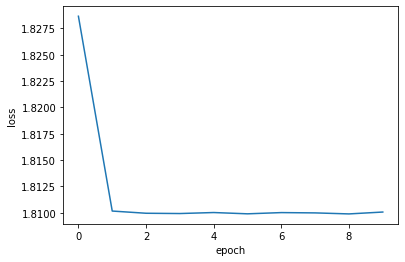

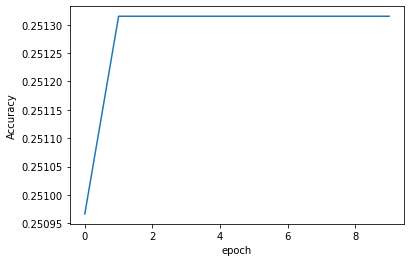

In [69]:
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(history.history['loss'])

plt.figure()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['acc'])

In [70]:
test_loss, test_acc = model.evaluate(test_data_X_2D_VGG, test_data_y)
print('test_acc: ', test_acc)

test_loss, val_acc = model.evaluate(val_data_X_2D_VGG, val_data_y)
print('val_acc: ', val_acc)

3589/3589 [==============================] - 2s 543us/step
test_acc:  0.2449150181191982
3589/3589 [==============================] - 1s 302us/step
val_acc:  0.24937308442878273


# Fine Tuning - model 2

In [76]:
vggModel = VGG16(include_top=False, weights='imagenet', input_shape=(48,48,3))

for layer in vggModel.layers:
  layer.trainable = False


model = models.Sequential()
model.add(vggModel)
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))

model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_10 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_331 (Dense)            (None, 100)               51300     
_________________________________________________________________
dropout_228 (Dropout)        (None, 100)               0         
_________________________________________________________________
dense_332 (Dense)            (None, 100)               10100     
_________________________________________________________________
dropout_229 (Dropout)        (None, 100)               0         
_________________________________________________________________
dense_333 (Dense)            (None, 100)             

In [0]:
%%time
history = model.fit(train_data_X_2D_VGG, train_data_y, epochs=10, batch_size=1000)

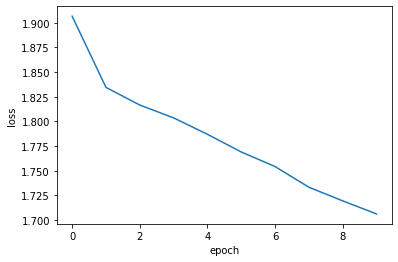

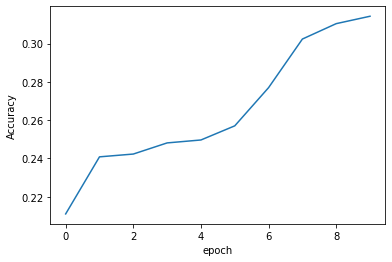

In [78]:
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(history.history['loss'])

plt.figure()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['acc'])

In [79]:
test_loss, test_acc = model.evaluate(test_data_X_2D_VGG, test_data_y)
print('test_acc: ', test_acc)

test_loss, val_acc = model.evaluate(val_data_X_2D_VGG, val_data_y)
print('val_acc: ', val_acc)

3589/3589 [==============================] - 2s 546us/step
test_acc:  0.36110337142095356
3589/3589 [==============================] - 1s 307us/step
val_acc:  0.37057676233349157


# Fine Tuning - Model 3

In [80]:
vggModel = VGG16(include_top=False, weights='imagenet', input_shape=(48,48,3))

for layer in vggModel.layers:
  layer.trainable = False


model = models.Sequential()
model.add(vggModel)
model.add(layers.Flatten())
model.add(layers.Dense(500, activation='sigmoid'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(500, activation='sigmoid'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(500, activation='sigmoid'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))

model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_11 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_336 (Dense)            (None, 500)               256500    
_________________________________________________________________
dropout_232 (Dropout)        (None, 500)               0         
_________________________________________________________________
dense_337 (Dense)            (None, 500)               250500    
_________________________________________________________________
dropout_233 (Dropout)        (None, 500)               0         
_________________________________________________________________
dense_338 (Dense)            (None, 500)             

In [0]:
%%time
history = model.fit(train_data_X_2D_VGG, train_data_y, epochs=40, batch_size=1000)

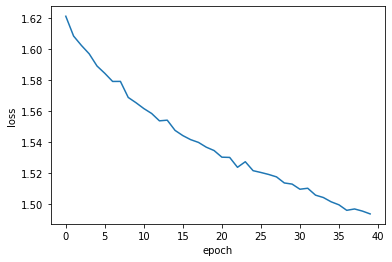

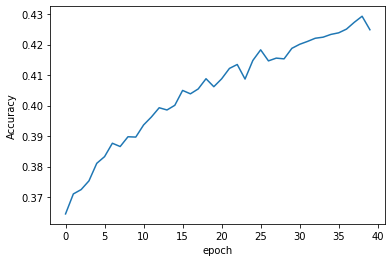

In [85]:
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(history.history['loss'])

plt.figure()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['acc'])

In [86]:
test_loss, test_acc = model.evaluate(test_data_X_2D_VGG, test_data_y)
print('test_acc: ', test_acc)

test_loss, val_acc = model.evaluate(val_data_X_2D_VGG, val_data_y)
print('val_acc: ', val_acc)

3589/3589 [==============================] - 1s 304us/step
test_acc:  0.4221231540860689
3589/3589 [==============================] - 1s 306us/step
val_acc:  0.4290888827303453


# Bayesian Optimization

In [0]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.metrics import roc_auc_score
import sys

In [0]:
space = {
            'NumFilters': hp.choice('NumFilters', [5,10,20,30]),
            'NumNeurons': hp.choice('NumNeurons', [50,100,500,1024]),
            'activation': hp.choice('activation', ['relu', 'sigmoid']),
            'DropOut_p': hp.uniform('DropOut_p', 0.2,0.75),
            'NumConvLayers': hp.choice('NumConvLayers', [2,3,4])
        }

def CNN_Optimization(params):
  
    print ('Params testing: ', params)
    model = models.Sequential()
    
    model.add(layers.Conv2D(filters = params['NumFilters'], kernel_size = 3, input_shape = (48,48,1), activation = params['activation']))
    model.add(layers.Dropout(params['DropOut_p']))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Conv2D(filters = params['NumFilters'], kernel_size = 3, activation = params['activation']))
    model.add(layers.Dropout(params['DropOut_p']))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))

    if params['NumConvLayers'] >= 3:
      model.add(layers.Conv2D(filters = params['NumFilters'], kernel_size = 3, activation = params['activation']))
      model.add(layers.Dropout(params['DropOut_p']))
      model.add(layers.MaxPooling2D(pool_size=(2,2)))
    
    if params['NumConvLayers'] >= 4:
      model.add(layers.Conv2D(filters = params['NumFilters'], kernel_size = 3, activation = params['activation']))
      model.add(layers.Dropout(params['DropOut_p']))
      model.add(layers.MaxPooling2D(pool_size=(2,2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(params['NumNeurons'], activation = params['activation']))
    model.add(layers.Dense(7, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(train_data_X_2D, train_data_y, epochs=100, batch_size=1000, verbose = 0)

    val_loss, val_acc = model.evaluate(val_data_X_2D, val_data_y)
    test_loss, test_acc = model.evaluate(test_data_X_2D, test_data_y)
    print('Accuracy in validation set:', val_acc)
    print('Accuracy in test set:', test_acc)
    sys.stdout.flush() 
    return {'loss': -val_acc, 'status': STATUS_OK}


trials = Trials()
best = fmin(CNN_Optimization, space, algo=tpe.suggest, max_evals=5, trials=trials)
print('best: ', best)

Params testing: 
{'DropOut_p': 0.22697443952894894, 'NumConvLayers': 4, 'NumFilters': 30, 'NumNeurons': 1024, 'activation': 'relu'}
  0%|          | 0/5 [00:00<?, ?it/s, best loss: ?]WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








  32/3589 [..............................]
 - ETA: 15s

 480/3589 [===>..........................]
 - ETA: 1s 

 800/3589 [=====>........................]
 - ETA: 0s

1152/3589 [========>.....................]
 - ETA: 0s

1504/3589 [===========>..................]
 - ETA: 0s


# Data augmentation

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
#dataGenObj = ImageDataGenerator(brightness_range=[0.2,1.0], rotation_range=90, horizontal_flip=True, height_shift_range=0.5, width_shift_range=[-200,200])
dataGenObj = ImageDataGenerator(brightness_range=[0.2,1.0], rotation_range=90, horizontal_flip=True, vertical_flip=True)
New_Augmented_data_X_y = dataGenObj.flow( (train_data_X_2D, train_data_y) ,batch_size=1)

(1, 48, 48, 1)
(1, 48, 48, 1)
(1, 48, 48, 1)
(1, 48, 48, 1)
(1, 48, 48, 1)
(1, 48, 48, 1)


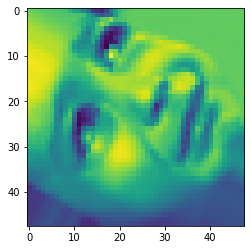

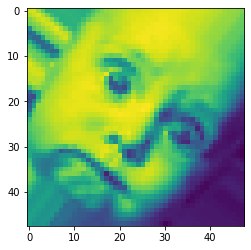

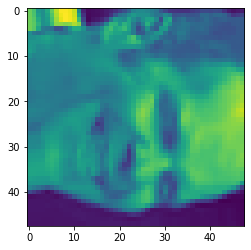

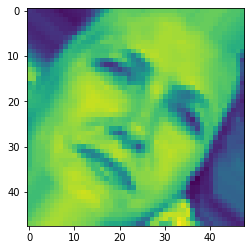

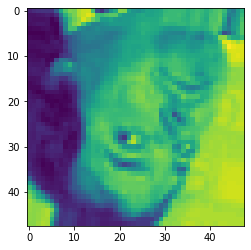

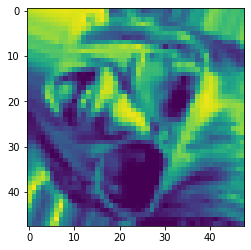

In [0]:
for i,img in enumerate(New_Augmented_data_X_y):
  plt.figure()
  plt.imshow(np.squeeze(img[0]))
  if i == 5:
    break

# Features

In [0]:
from skimage.feature import hog

In [0]:
train_data_X_2D_HOG = np.zeros( (1000, 48*48) )
val_data_X_2D_HOG = np.zeros( (100, 48*48) )
test_data_X_2D_HOG = np.zeros( (100, 48*48) )

for i in range(1000):
  fd, hog_image = hog(np.squeeze(train_data_X_2D[i,:,:]), orientations=8, pixels_per_cell=(2, 2), cells_per_block=(1, 1), visualize=True, multichannel=False)
  train_data_X_2D_HOG[i,:] = hog_image.reshape(1,48*48)

for i in range(100):
  fd, hog_image = hog(np.squeeze(val_data_X_2D[i,:,:]), orientations=8, pixels_per_cell=(2, 2), cells_per_block=(1, 1), visualize=True, multichannel=False)
  val_data_X_2D_HOG[i,:] = hog_image.reshape(1,48*48)

for i in range(100):
  fd, hog_image = hog(np.squeeze(test_data_X_2D[i,:,:]), orientations=8, pixels_per_cell=(2, 2), cells_per_block=(1, 1), visualize=True, multichannel=False)
  test_data_X_2D_HOG[i,:] = hog_image.reshape(1,48*48)

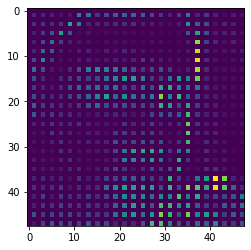

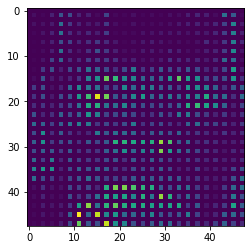

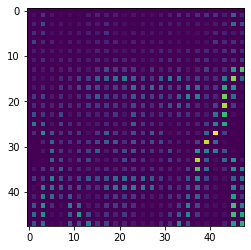

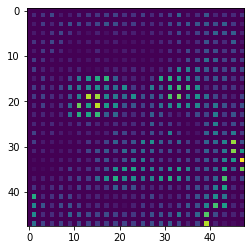

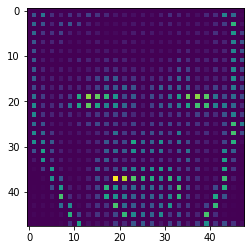

In [108]:
plt.figure()
plt.imshow(train_data_X_2D_HOG[0,:].reshape(48,48))
plt.figure()
plt.imshow(train_data_X_2D_HOG[10,:].reshape(48,48))
plt.figure()
plt.imshow(train_data_X_2D_HOG[50,:].reshape(48,48))
plt.figure()
plt.imshow(train_data_X_2D_HOG[100,:].reshape(48,48))
plt.figure()
plt.imshow(train_data_X_2D_HOG[110,:].reshape(48,48))

In [102]:
FNN_network_featuresNetwork = generate_FNN_model_2()
history = FNN_network_featuresNetwork.fit(train_data_X_2D_HOG, train_data_y[0:1000], epochs=1000, batch_size=60000)

Epoch 1/1000
1000/1000 [==============================] - 2s 2ms/step - loss: 10.1148 - acc: 0.1730
Epoch 2/1000
1000/1000 [==============================] - 0s 15us/step - loss: 8.1964 - acc: 0.1630
Epoch 3/1000
1000/1000 [==============================] - 0s 14us/step - loss: 7.1237 - acc: 0.1550
Epoch 4/1000
1000/1000 [==============================] - 0s 13us/step - loss: 6.4911 - acc: 0.1650
Epoch 5/1000
1000/1000 [==============================] - 0s 13us/step - loss: 6.2672 - acc: 0.1610
Epoch 6/1000
1000/1000 [==============================] - 0s 13us/step - loss: 5.4549 - acc: 0.1440
Epoch 7/1000
1000/1000 [==============================] - 0s 14us/step - loss: 5.1063 - acc: 0.1450
Epoch 8/1000
1000/1000 [==============================] - 0s 12us/step - loss: 4.1903 - acc: 0.1480
Epoch 9/1000
1000/1000 [==============================] - 0s 13us/step - loss: 3.6094 - acc: 0.1590
Epoch 10/1000
1000/1000 [==============================] - 0s 13us/step - loss: 3.4730 - acc: 0.1670

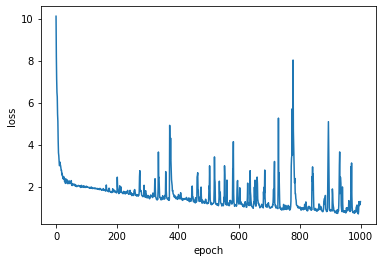

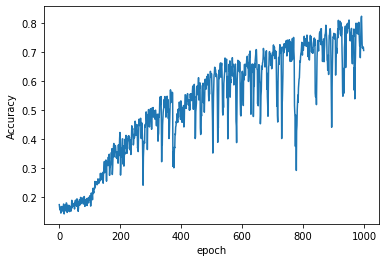

In [103]:
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(history.history['loss'])

plt.figure()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['acc'])

In [105]:
test_loss, test_acc = FNN_network_featuresNetwork.evaluate(test_data_X_2D_HOG, test_data_y[0:100])
print('test_acc: ', test_acc)

test_loss, val_acc = FNN_network_featuresNetwork.evaluate(val_data_X_2D_HOG, val_data_y[0:100])
print('val_acc: ', val_acc)

100/100 [==============================] - 1s 10ms/step
test_acc:  0.29
100/100 [==============================] - 0s 135us/step
val_acc:  0.3
